In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN

In [3]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)


17465344/17464789 [==============================] - 22s 1us/step


In [6]:
from keras.layers import Dense
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 621us/step - loss: 0.6443 - acc: 0.6117 - val_loss: 0.4845 - val_acc: 0.7832
Epoch 2/10
20000/20000 [==============================] - 12s 600us/step - loss: 0.4519 - acc: 0.7990 - val_loss: 0.4724 - val_acc: 0.7940
Epoch 3/10
20000/20000 [==============================] - 12s 608us/step - loss: 0.3021 - acc: 0.8804 - val_loss: 0.3720 - val_acc: 0.8534
Epoch 4/10
20000/20000 [==============================] - 13s 626us/step - loss: 0.2377 - acc: 0.9060 - val_loss: 0.3706 - val_acc: 0.8506
Epoch 5/10
20000/20000 [==============================] - 13s 636us/step - loss: 0.1896 - acc: 0.9283 - val_loss: 0.4811 - val_acc: 0.7908
Epoch 6/10
20000/20000 [==============================] - 12s 614us/step - loss: 0.1406 - acc: 0.9490 - val_loss: 0.4276 - val_acc: 0.8252
Epoch 7/10
20000/20000 [==============================] - 12s 607us/step - loss: 0.1050 - acc: 0.9641 - val_loss: 0.7

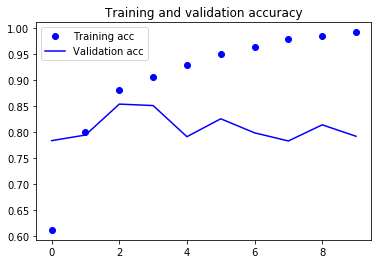

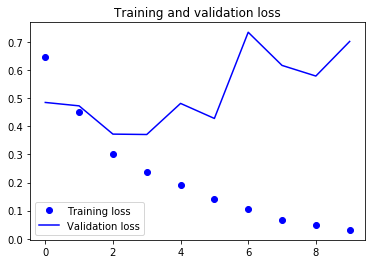

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()